In [4]:
!dir

 Volume in drive D is New Volume
 Volume Serial Number is A82C-AE2B

 Directory of D:\astrocomb\KeckLFC-deploy

06/24/2024  11:43 AM    <DIR>          .
04/16/2024  02:33 PM    <DIR>          ..
04/16/2024  02:39 PM                68 .gitattributes
04/16/2024  02:39 PM             1,479 .gitignore
04/16/2024  02:39 PM    <DIR>          .vscode
04/16/2024  02:39 PM    <DIR>          Arduino Codes
04/16/2024  02:39 PM             1,161 Global.py
04/16/2024  02:39 PM    <DIR>          GUI test
06/23/2024  11:08 AM    <DIR>          Hardware
06/23/2024  09:59 PM            59,846 HSF Comb KTL Keywords.xlsx
06/23/2024  10:30 AM            70,296 KeckLFC.py
06/22/2024  05:58 PM    <DIR>          KTL server
04/16/2024  02:39 PM            18,308 LFC.xml.sin
04/16/2024  02:39 PM            15,681 LFC_GUI.py
04/16/2024  02:39 PM             1,090 LICENSE
04/16/2024  02:39 PM    <DIR>          Local server
06/24/2024  11:47 AM    <DIR>          Notebooks
04/16/2024  02:39 PM             4,895 ov

In [3]:
import os
os.chdir(r'D:\astrocomb\KeckLFC-deploy')

In [44]:
import numpy as np
from pulse_width_simulation import HNLFmodule, PulseGenerator, PulseSim

c_const = 299792.458  # nm/ps
l_c = 1560  # nm
d_factor = -l_c**2 / (2 * np.pi * c_const)  # ps * nm

# Fiber properties
# PM1550-XP fiber1
alpha1 = 0.5e-3  # Insertion loss
d1 = 18.5  # ps/(nm km)
beta1 = [d1 * 1e-3 * d_factor]  # ps^n m^-1
gamma1 = 1.3e-3  # W-1m-1
fiber1 = PulseSim(2, alpha1, beta1, gamma1)

# ND HNLF
alpha2 = 0.8e-3  # Insertion loss
d2 = -3  # ps/(nm km)
beta2 = [d2 * 1e-3 * d_factor]  # ps^n m^-1
gamma2 = 10.7e-3  # W-1m-1
fiber2 = PulseSim(8, alpha2, beta2, gamma2, loss = 0.6)

# Buffer PM1550-XP
fiber3 = PulseSim(2.5, alpha1, beta1, gamma1, loss = 0.6)

# AD HNLF
# d3 = 5.6  # ps/(nm km)
# beta3 = [d3 * 1e-3 * d_factor]  # ps^n m^-1
# fiber4 = PulseSim(0.2, alpha2, beta3, gamma2)

# Buffer after HNLF                                                                                                                                                                                                                                                                                                                                                                                                                  
# fiber5 = PulseSim(0.5, alpha1, beta1, gamma1)









In [47]:
# Input pulse characterization
f_rep = 16e-3  # THz
NT = 2**15
T = np.linspace(-.5 / f_rep, .5 / f_rep, NT)  # ps
Pin_ave = 3.7  # W

pg = PulseGenerator(f_rep, T, Pin_ave, c_const / l_c)
A0 = pg.getEOMPulse(LineNum = 42)
A0 = pg.addDispersion(A0 , disp2 = -5.7)
A1 = pg.getEOMPulse(LineNum = 68)
A1 = pg.addDispersion(A1 , disp2 = 2.4)

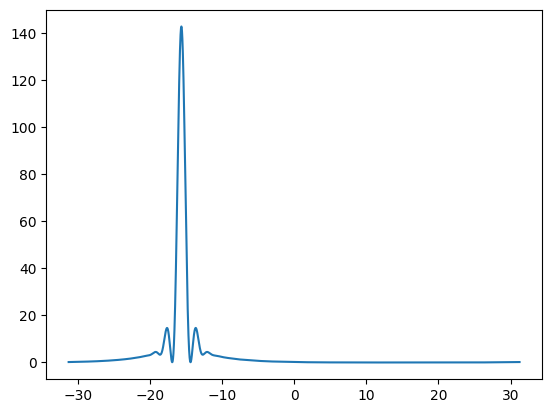

In [40]:
pg.plotpulse(A0)

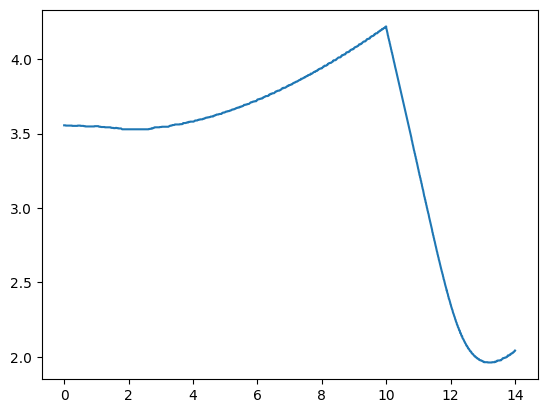

In [50]:
fiber3 = PulseSim(4, alpha1, beta1, gamma1, loss = 0.6)
HNLF = HNLFmodule([fiber1,fiber2,fiber3])
HNLF.input(T, A0, c_const/l_c)
HNLF.calc(dz = 0.01)
L, PW = HNLF.plotpulsewidth()

array([0.00000000e+00, 1.00502513e-02, 2.01005025e-02, ...,
       1.19798995e+01, 1.19899497e+01, 1.20000000e+01])

2075.25864436775 fs at 2.5600000000000005m


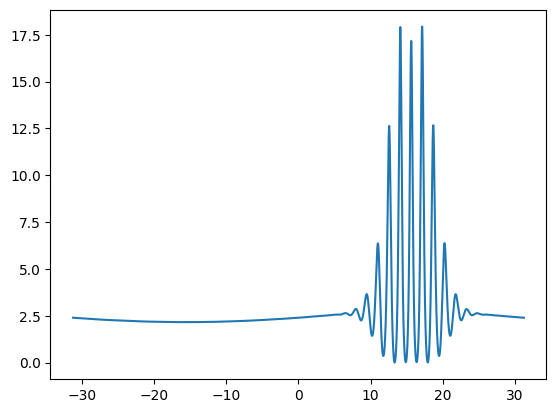

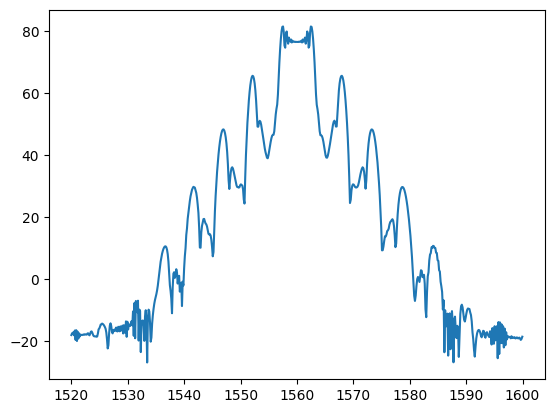

pulse width 2.07525864436775 ps, autocorrelation width 7.269127475813875 (4.710394604327391) ps, power 2.78259813257308 W


In [49]:
z_min = L[np.argmin(PW)]
P_min = np.min(PW)
print(f'{P_min * 1000} fs at {z_min - 1.5 - 8.44}m')
A = HNLF.getA(z_min)
pg.evaluate(A)

In [ ]:
for l in [7, 7.5, 8.5, 9, 9.5]:
    print(f'\n\nND fiber length {l}m')
    fiber2 = PulseSim(l, alpha2, beta2, gamma2, loss = 0.6)
    HNLF = HNLFmodule([fiber1,fiber2,fiber3])
    HNLF.input(T, A0, c_const/l_c)
    HNLF.calc(dz = 0.01)
    L, PW = HNLF.plotpulsewidth()
    z_min = L[np.argmin(PW)]
    P_min = np.min(PW)
    print(f'{P_min * 1000} fs at {z_min - 1.5 - l}m')
    A = HNLF.getA(z_min)
    pg.evaluate(A)